# *House Price Prediction - Properatti*

 _Authors:_ 

- Pedro Terrado
- Segundo Rodriguez Parodi
- Pedro Roisman
- Thomas Gomez

_Dataset Info_

- operation (sell)
- property_type (apartment, ph, house)
- place_name     
- place_with_parent_names 
- country_name             
- state_name               
- geonames_id (not all available)             
- lat-lon                  
- lat                   
- lon                   
- price                 
- currency (ARS, USD)             
- price_aprox_local_currency 
- price_aprox_usd            
- surface_total_in_m2        
- surface_covered_in_m2      
- price_usd_per_m2           
- price_per_m2               
- floor                      
- rooms                      
- expenses                  
- properati_url             
- description               
- title                     


#### [1 - Dataset Preparation](#section_preparacion)

#### [2 - Data Wrangling](#section_datawrangling)

#### [3 - New Features](#section_nuevasvariables)

#### [4 - Cleaning Outliers](#section_outliers)

#### [5 - Final Dataset](#section_datasetfinal)


----

# [1 - Dataset Preparation](#section_preparacion)

#### $\hspace{.5cm}$[1.1 - Import libraries and load the dataset](#seccion_import)

#### $\hspace{.5cm}$[1.2 - Description of the dataset and null values](#seccion_description)

#### $\hspace{.5cm}$[1.3 - Features selection ](#seccion_features)

## [1.1 - Import libraries and load the dataset](#seccion_import)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Reading the data and creating a DataFrame

data = pd.read_csv('../../../properatti.csv')

## [1.2 - Description of the dataset and nulls values](#seccion_description)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [4]:
round(data.isnull().sum() / data.shape[0],2)

Unnamed: 0                    0.00
operation                     0.00
property_type                 0.00
place_name                    0.00
place_with_parent_names       0.00
country_name                  0.00
state_name                    0.00
geonames_id                   0.15
lat-lon                       0.43
lat                           0.43
lon                           0.43
price                         0.17
currency                      0.17
price_aprox_local_currency    0.17
price_aprox_usd               0.17
surface_total_in_m2           0.32
surface_covered_in_m2         0.16
price_usd_per_m2              0.43
price_per_m2                  0.28
floor                         0.93
rooms                         0.61
expenses                      0.88
properati_url                 0.00
description                   0.00
title                         0.00
image_thumbnail               0.03
dtype: float64

In [5]:
data.shape

(121220, 26)

In [6]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

<AxesSubplot:title={'center':'Amoun of properties by type'}, xlabel='property_type', ylabel='count'>

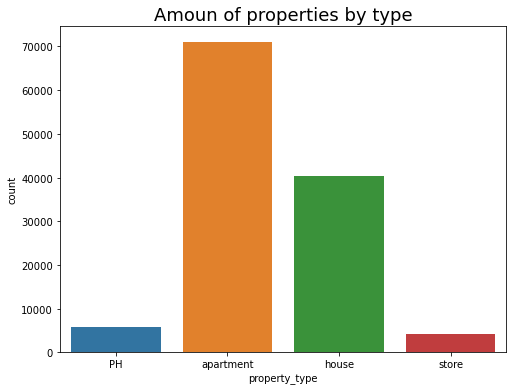

In [7]:
plt.subplots(figsize=(8,6))
plt.title('Amoun of properties by type', fontsize=18)
sns.countplot(x='property_type',data=data)

## [1.3 - Features selection ](#seccion_features)

- Drop 'price' column, and 'currency' because they're already merged in 'price_aprox_usd'.
- Drop columns with a high percentage of null values.

In [8]:
data.drop(['lat-lon', 'lat', 'lon', 'floor', 'expenses', 'properati_url', 'image_thumbnail', 'Unnamed: 0', 
         'geonames_id', 'price', 'currency', 'country_name', 'price_aprox_local_currency', 'price_per_m2'], axis=1, inplace=True)

# [2 - Data Wrangling](#section_datawrangling)

#### $\hspace{.5cm}$[2.1 - Duplicated values and 'price_aprox_usd' column](#seccion_duplicated)

#### $\hspace{.5cm}$[2.2 - Work on location columns](#seccion_location)

#### $\hspace{.5cm}$[2.3 - Work on surface columns](#seccion_surface)

#### $\hspace{.5cm}$[2.4 - Create 'price_usd_per_m2' column](#seccion_pricem2)

#### $\hspace{.5cm}$[2.5 - Create 'price_usd_per_m2' column](#seccion_pricem2)

## [2.1 - Duplicated values and 'price_aprox_usd' column](#seccion_duplicated)

In [9]:
# Dropping duplicated values

print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

5410


In [10]:
print('Number of rows after drop duplicated values --->', data.shape[0])

Number of rows after drop duplicated values ---> 115810


In [11]:
print('Number of rows after cleaning --->', data.shape[0])
print('Number of columns after cleaning --->', data.shape[1])

Number of rows after cleaning ---> 115810
Number of columns after cleaning ---> 12


In [12]:
data['price_aprox_usd'].describe()

count    9.843600e+04
mean     2.408911e+05
std      3.938126e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.450000e+05
75%      2.680000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [13]:
# Drop the values below 10.000 USD because, probably, they are users loading errors

data.drop(data[data['price_aprox_usd'] < 9000].index, axis = 0, inplace=True)

In [14]:
data.shape

(115715, 12)

## [2.2 - Work on location columns](#seccion_duplicated)

In [15]:
data.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,|Argentina|Capital Federal|Mataderos|
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,|Argentina|Capital Federal|Mataderos|
3,|Argentina|Capital Federal|Liniers|
4,|Argentina|Buenos Aires Costa Atlántica|Mar de...
5,|Argentina|Entre Ríos|Gualeguaychú|
6,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...
7,|Argentina|Capital Federal|Belgrano|
8,|Argentina|Capital Federal|Belgrano|
9,|Argentina|Santa Fe|Rosario|


In [16]:
import re

patron_regex_arg = re.compile("\|Argentina\|")
data["place_with_parent_names"] = data["place_with_parent_names"].apply(lambda x: x if x is np.NaN else patron_regex_arg.sub("",x))

In [17]:
data.loc[:, ["place_with_parent_names"]].head(10)

,place_with_parent_names
0,Capital Federal|Mataderos|
1,Bs.As. G.B.A. Zona Sur|La Plata|
2,Capital Federal|Mataderos|
3,Capital Federal|Liniers|
4,Buenos Aires Costa Atlántica|Mar del Plata|Cen...
5,Entre Ríos|Gualeguaychú|
6,Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7,Capital Federal|Belgrano|
8,Capital Federal|Belgrano|
9,Santa Fe|Rosario|


In [18]:
data[["state","town", "extra_info"]] = data["place_with_parent_names"].str.split("|",n=2, expand=True)
data.loc[:,["state","town", "extra_info"]]

,state,town,extra_info
0,Capital Federal,Mataderos,
1,Bs.As. G.B.A. Zona Sur,La Plata,
2,Capital Federal,Mataderos,
3,Capital Federal,Liniers,
4,Buenos Aires Costa Atlántica,Mar del Plata,Centro|
...,...,...,...
121215,Capital Federal,Belgrano,
121216,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar|
121217,Capital Federal,Villa Urquiza,
121218,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón|


In [19]:
same_town_state = data["state"] == data["town"]
no_town = data["town"] == ""

print('Same town and state', '\n' ,same_town_state.value_counts(), '\n')
print('Properties with no town', '\n', no_town.value_counts())

Same town and state 
 False    108310
True       7405
dtype: int64 

Properties with no town 
 False    111323
True       4392
Name: town, dtype: int64


In [20]:
data.loc[same_town_state, ["state_name", "place_name", "place_with_parent_names", "state", "town", "extra_info"]]

,state_name,place_name,place_with_parent_names,state,town,extra_info
10,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
32,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
87,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
88,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
89,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
...,...,...,...,...,...,...
120690,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120966,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120971,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,
120979,Córdoba,Córdoba,Córdoba|Córdoba|,Córdoba,Córdoba,


In [21]:
data.loc[no_town,['state_name', 'place_name', 'state','town', 'extra_info']]

,state_name,place_name,state,town,extra_info
108,Capital Federal,Capital Federal,Capital Federal,,None
110,Capital Federal,Capital Federal,Capital Federal,,None
115,Capital Federal,Capital Federal,Capital Federal,,None
119,Capital Federal,Capital Federal,Capital Federal,,None
121,Capital Federal,Capital Federal,Capital Federal,,None
...,...,...,...,...,...
121200,Córdoba,Córdoba,Córdoba,,None
121202,Córdoba,Córdoba,Córdoba,,None
121203,Córdoba,Córdoba,Córdoba,,None
121205,Córdoba,Córdoba,Córdoba,,None


In [22]:
print(data.shape)
data.drop(data.loc[same_town_state].index, axis=0, inplace=True)
data.drop(data.loc[no_town].index, axis=0, inplace=True)
print(data.shape)

(115715, 15)
(103918, 15)


In [23]:
data.isnull().sum()

operation                      0
property_type                  0
place_name                    23
place_with_parent_names        0
state_name                     0
price_aprox_usd            14441
surface_total_in_m2        32164
surface_covered_in_m2      15211
price_usd_per_m2           41592
rooms                      61713
description                    2
title                          0
state                          0
town                           0
extra_info                     0
dtype: int64

In [24]:
data.drop(['place_name', 'place_with_parent_names', 'state_name'], axis=1, inplace=True)

In [25]:
data.head(3)

,operation,property_type,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,title,state,town,extra_info
0,sell,PH,62000.0,55.0,40.0,1127.272727,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,
1,sell,apartment,150000.0,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,Bs.As. G.B.A. Zona Sur,La Plata,
2,sell,apartment,72000.0,55.0,55.0,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,


## [2.3 - Work on surface columns](#seccion_duplicated)

In [26]:
print('Null values in surface_total_in_m2:', data['surface_total_in_m2'].isnull().sum())
print('Null values in surface_covered_in_m2:', data['surface_covered_in_m2'].isnull().sum())

Null values in surface_total_in_m2: 32164
Null values in surface_covered_in_m2: 15211


In [27]:
zeros_surface_total = data['surface_total_in_m2'] == 0
zeros_surface_total.value_counts()

False    103560
True        358
Name: surface_total_in_m2, dtype: int64

In [28]:
zeros_surface_covered = data['surface_covered_in_m2'] == 0
zeros_surface_covered.value_counts()

False    103916
True          2
Name: surface_covered_in_m2, dtype: int64

In [29]:
data['surface_total_zeros'] = data['surface_total_in_m2'].fillna(0)
data['surface_covered_zeros'] = data['surface_covered_in_m2'].fillna(0)

In [30]:
# We're going to assign 1 to data with value in 'surface_total_in_m2' but without in 'surface_covered_in_m2'

covered_vs_total = data.apply(lambda x : 1 if x['surface_total_zeros']!= 0 and x['surface_covered_zeros'] == 0 else 0, axis=1)
covered_vs_total.value_counts()

0    98294
1     5624
dtype: int64

In [31]:
# Here, we're going to assign 1 to data with values in 'surface_covered_zeros' and without values in 'surface_total_zeros'  

covered_vs_total_1 = data.apply(lambda x : 1 if x['surface_total_zeros']== 0 and x['surface_covered_zeros'] != 0 else 0, axis=1)
covered_vs_total_1.value_counts()

0    80985
1    22933
dtype: int64

#### - Let's create a ratio to calculate m2 total divided by m2 covered by each property type. 
#### - After that, we're going to complete the data with this ratio.
#### - However, we need to take care of the outliers first, don't want to skew the ratio, right?

In [32]:
print(data['surface_total_zeros'].describe(), '\n')

count    103918.000000
mean        158.071556
std        1191.277923
min           0.000000
25%           0.000000
50%          53.000000
75%         136.000000
max      200000.000000
Name: surface_total_zeros, dtype: float64 



In [33]:
mask_outliers_max_surface_total_zeros = data[data['surface_total_zeros'] > 150].index

In [34]:
data.drop(mask_outliers_max_surface_total_zeros, axis=0, inplace=True)

In [35]:
data.shape

(80053, 14)

<AxesSubplot:xlabel='property_type', ylabel='surface_total_zeros'>

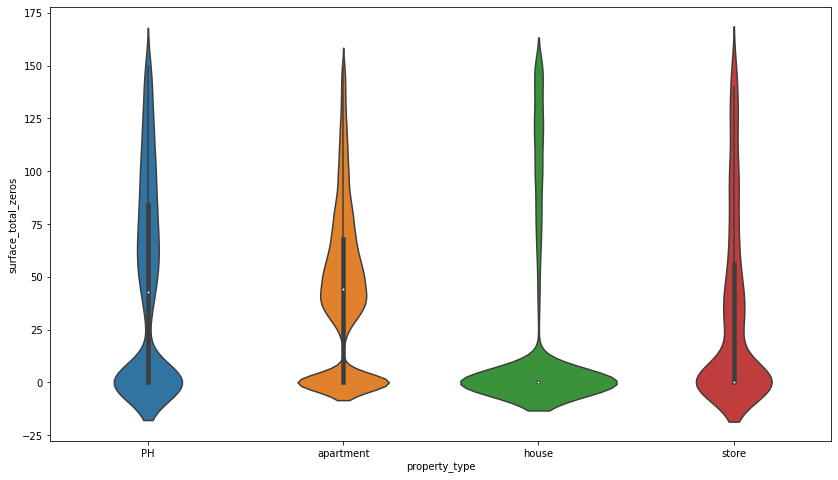

In [36]:
plt.subplots(figsize=(14, 8))
sns.violinplot(data=data, x='property_type', y='surface_total_zeros')

In [37]:
print(data['surface_covered_zeros'].describe())

count     80053.000000
mean         76.104693
std         726.421728
min           0.000000
25%          31.000000
50%          50.000000
75%          82.000000
max      187000.000000
Name: surface_covered_zeros, dtype: float64


In [38]:
mask_outliers_max_surface_covered_zeros = data[data['surface_covered_zeros'] > 140].index

In [39]:
print(mask_outliers_max_surface_covered_zeros.shape[0])

7205


In [40]:
data.drop(mask_outliers_max_surface_covered_zeros, axis=0, inplace=True)

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_zeros'>

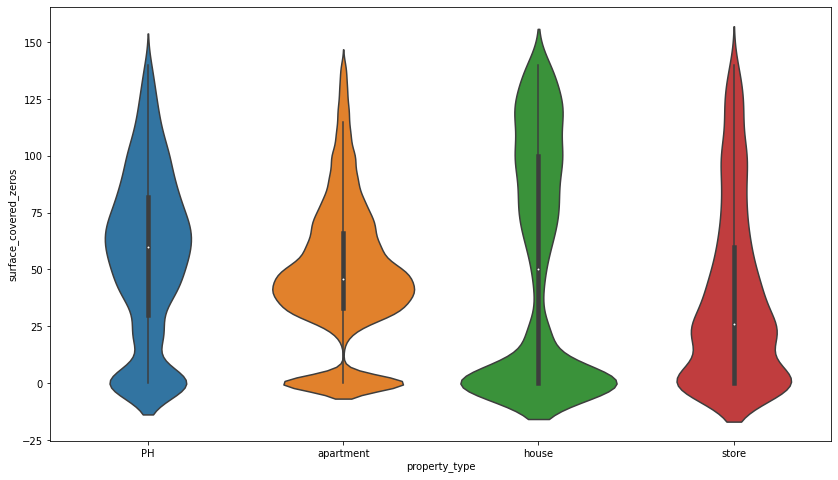

In [41]:
plt.subplots(figsize=(14, 8))
sns.violinplot(data=data, x='property_type', y='surface_covered_zeros')

In [42]:
# Ok, so let's create a function to calculate the mean between total and covered surface based on property_type

def average_in(prop):
    property_type = data['property_type'] == prop
    average_type = data[property_type]
    average = average_type.apply(lambda x : np.nan if x['surface_total_zeros'] == 0 or x['surface_covered_zeros'] == 0 
                                 else x['surface_total_zeros']/x['surface_covered_zeros'], axis = 1)
    return average.mean()

ap = 'apartment'
ho = 'house'
ph = 'PH'
st = 'store'

ratio_ap = average_in(ap)
ratio_ho = average_in(ho)
ratio_ph = average_in(ph)
ratio_st = average_in(st)

print('Ratio Apartment:', ratio_ap)
print('Ratio House:', ratio_ho)
print('Ratio PH:', ratio_ph)
print('Ratio Store:', ratio_st)

Ratio Apartment: 1.215394963110801
Ratio House: 1.310394105512601
Ratio PH: 1.3203235978425765
Ratio Store: 1.389246465306496


In [43]:
# Let's fill in the data with zero in surface_total_in_m2 but with de data in surface_covered by property_type 'apartment'. 

total_ap = data.apply(lambda x: (x['surface_covered_zeros']*ratio_ap) if x['surface_total_zeros']==0 and x['surface_covered_zeros']!=0 
                                           and x['property_type'] == ap else 0, axis=1) 

apartment_total = total_ap + data['surface_total_zeros']

apartment_total.value_counts()

0.000000     15124
40.000000     1492
50.000000     1388
60.000000     1189
45.000000     1181
             ...  
15.800135        1
3.646185         1
23.092504        1
20.661714        1
21.877109        1
Length: 275, dtype: int64

In [44]:
covered_ap = data.apply(lambda x: (x['surface_total_zeros']/ratio_ap) if x['surface_covered_zeros'] == 0 and x['surface_total_zeros'] != 0 
                                    and x['property_type'] == ap else 0, axis=1)

apartment_covered = covered_ap + data['surface_covered_zeros'] 

apartment_covered.value_counts()

0.000000      10307
40.000000      2182
50.000000      1851
45.000000      1653
60.000000      1566
              ...  
97.910559         1
15.632778         1
108.606670        1
9.873334          1
17.278334         1
Length: 278, dtype: int64

In [45]:
total_ho = data.apply(lambda x : (x['surface_covered_zeros']*ratio_ho) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                   and x['property_type'] == ho else 0, axis=1)

house_total = total_ho + data['surface_total_zeros']

house_total.value_counts()

0.000000     22311
40.000000     1492
50.000000     1388
60.000000     1189
45.000000     1181
             ...  
38.001429        1
19.655912        1
36.691035        1
44.553400        1
56.346947        1
Length: 260, dtype: int64

In [46]:
covered_ho = data.apply(lambda x : (x['surface_total_zeros']/ratio_ho) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0 
                                    and x['property_type'] == ho else 0, axis=1)

house_covered = covered_ho + data['surface_covered_zeros']

house_covered.value_counts()

0.000000     13218
40.000000     2182
50.000000     1851
45.000000     1653
60.000000     1566
             ...  
40.445847        1
71.734144        1
54.945302        1
28.998909        1
58.760948        1
Length: 231, dtype: int64

In [47]:
total_ph = data.apply(lambda x : (x['surface_covered_zeros']*ratio_ph) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                  and x['property_type'] == ph else 0, axis=1)

ph_total = total_ph + data['surface_total_zeros']

ph_total.value_counts()

0.000000      24687
40.000000      1492
50.000000      1388
60.000000      1189
45.000000      1181
              ...  
183.524980        1
31.687766         1
167.681097        1
175.603039        1
15.843883         1
Length: 261, dtype: int64

In [48]:
covered_ph = data.apply(lambda x : (x['surface_total_zeros']/ratio_ph) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0 
                                     and x['property_type'] == ph else 0, axis=1)

ph_covered = covered_ph + data['surface_covered_zeros']

ph_covered.value_counts()

0.000000     13417
40.000000     2182
50.000000     1851
45.000000     1653
60.000000     1566
             ...  
93.916370        1
43.171235        1
17.419972        1
49.987746        1
23.479093        1
Length: 207, dtype: int64

In [49]:
total_st = data.apply(lambda x : (x['surface_covered_zeros']*ratio_st) if x['surface_total_zeros']==0 and x['surface_covered_zeros'] != 0 
                                    and x['property_type'] == st else 0, axis=1)

store_total = total_st + data['surface_total_zeros']

store_total.value_counts()

0.000000      25476
40.000000      1492
50.000000      1388
60.000000      1189
45.000000      1181
              ...  
4.167739          1
151.427865        1
143.092386        1
40.288147         1
130.589168        1
Length: 238, dtype: int64

In [50]:
covered_st = data.apply(lambda x : (x['surface_total_zeros']/ratio_st) if x['surface_covered_zeros']==0 and x['surface_total_zeros'] != 0
                                    and x['property_type'] == st else 0, axis=1)

store_covered = covered_st + data['surface_covered_zeros']

store_covered.value_counts()


0.000000      13399
40.000000      2182
50.000000      1851
45.000000      1653
60.000000      1566
              ...  
82.778688         1
97.894796         1
19.434996         1
103.653314        1
9.357591          1
Length: 227, dtype: int64

In [51]:
# Create new columns with the filled data 

data['surface_covered_m2'] = covered_st + covered_ph + covered_ho + covered_ap + data['surface_covered_zeros']

data['surface_total_m2'] = total_st + total_ph + total_ho + total_ap + data['surface_total_zeros']

In [52]:
covered_zeros_final = data['surface_covered_m2'] == 0
covered_zeros_final.value_counts()

False    63259
True      9589
Name: surface_covered_m2, dtype: int64

In [53]:
total_zeros_final = data['surface_total_m2'] == 0
total_zeros_final.value_counts()

False    63259
True      9589
Name: surface_total_m2, dtype: int64

#### - We're going to create a unique price_usd_m2 column (price_aprox_usd / surface_total_m2), to do that, we need to complete the column surface_total_m2 as much as we can! 
#### - Let's do some RegEx to extract information from the description column (free text) to complete the surface_total_m2 column.  

In [54]:
meters_value_pattern = '(?P<value_mts>\d{0,4} ?)(?P<meters>m2|mts|mt|mts2|mt2)'
meter_regex_pattern = re.compile(meters_value_pattern, re.IGNORECASE)

meters_value_match = data["description"].apply(lambda x:x if x is np.NaN else meter_regex_pattern.search(x).group("value_mts") if meter_regex_pattern.search(x)!=None else np.NaN)

data['meters_description'] = meters_value_match
data['meters_description'].unique()

array([nan, '106 ', ' ', ..., '544 ', '328 ', '697 '], dtype=object)

In [55]:
data['meters_description'].value_counts()

         1570
50        704
80        583
100       476
40        433
         ... 
5500        1
470         1
267         1
1230        1
1470        1
Name: meters_description, Length: 1052, dtype: int64

In [56]:
# We're going to expand 'description' to read the data 
pd.set_option("display.max_colwidth",1000)

data[["meters_description","description"]].head(10)

,meters_description,description
0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
1,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
2,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
3,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
4,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
5,NaN,"Casa en el perímetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballería casi Nágera. Vista libre a terreno en frente.Consta de dos dormitorios, baño, living cocina comedor integrado de buen tamaño, lavadero con despensero en aluminio.Patio privado con churrasquera, tapiales y puerta de acceso de servicio. Frente con rejas y pequeño patio con verde, porch de acceso.Gas natural en la puerta. Aire acondicionado frío/calor. Baulera para guardado sobre pasillo. Muy buen estado en general de pisos, revestimientos, pintura, etc.Apto crédito. Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
6,106,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
7,NaN,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
8,NaN,"EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
9,NaN,"MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLOK 67LISTO PARA ESCRITURARPLANTA BAJA CON PATIO2 DORMITORIOSLIVING COMEDORCOCINA INDEPENDIENTELAVADEROPATIOS ADELANTE Y ATRÁSLUMINOSO, MUY BUENA VENTILACIÓNIMPUESTOS Y SERVICIOS AL DIADEUDA DE LA VIVIENDA TOTALMENTE CANCELADA Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."


In [57]:
# Replace zero values with NaN in 'surface_total_zeros' and print the sum of null values. 

data['surface_total_m2'] = data['surface_total_m2'].replace(0, np.NaN)
data['surface_total_m2'].isnull().sum()

9589

- #### Replacing null values from 'surface_total_zeros' with the data obtained from 'meters_description' column 

In [58]:
data["surface_total_m2"].fillna(data["surface_total_m2"], inplace=True)

# Let's see the amount of nulls after imputar

print(data["surface_total_m2"].isnull().sum())

9589


In [59]:
data.shape

(72848, 17)

- #### Drop null rows in 'surface_total_m2'

In [60]:
data.dropna(subset=['surface_total_m2'], inplace=True)
data.shape

(63259, 17)

In [61]:
data.columns

Index(['operation', 'property_type', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'description',
       'title', 'state', 'town', 'extra_info', 'surface_total_zeros',
       'surface_covered_zeros', 'surface_covered_m2', 'surface_total_m2',
       'meters_description'],
      dtype='object')

In [62]:
data.drop(['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'surface_total_zeros', 'surface_covered_zeros', 'meters_description'], axis=1, inplace=True)

In [63]:
data.head(3)

,operation,property_type,price_aprox_usd,rooms,description,title,state,town,extra_info,surface_covered_m2,surface_total_m2
0,sell,PH,62000.0,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,,40.0,55.0
2,sell,apartment,72000.0,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,,55.0,55.0
4,sell,apartment,64000.0,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,Buenos Aires Costa Atlántica,Mar del Plata,Centro|,35.0,35.0


- #### Convert data to float and replace '' for NaN values

In [64]:
data['surface_total_m2'].replace('', np.NaN)
print(data['surface_total_m2'].isna().sum())
pd.to_numeric(data['surface_total_m2'])

0


0          55.000000
2          55.000000
4          35.000000
5          53.000000
6         106.000000
             ...    
121210    157.247293
121214    123.000000
121215    113.000000
121217     46.000000
121218     48.000000
Name: surface_total_m2, Length: 63259, dtype: float64

In [65]:
pd.set_option("display.max_colwidth",50)

In [66]:
pd.options.mode.chained_assignment = None  # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

## [2.4 - Create 'price_usd_per_m2' column](#seccion_pricem2)

In [67]:
data['price_usd_per_m2'] = data['price_aprox_usd'] / data['surface_total_m2']

In [68]:
data.isnull().sum()

operation                 0
property_type             0
price_aprox_usd        6371
rooms                 34118
description               1
title                     0
state                     0
town                      0
extra_info                0
surface_covered_m2        0
surface_total_m2          0
price_usd_per_m2       6371
dtype: int64

# [3 - New Features](#section_features)

#### $\hspace{.5cm}$[3.1 - Create 'repair' column](#seccion_repair)

#### $\hspace{.5cm}$[3.2 - Create 'pool' column](#seccion_pool)

#### $\hspace{.5cm}$[3.3 - Create 'amenities'](#seccion_amenities)

#### $\hspace{.5cm}$[3.4 - Create 'garage' column](#seccion_garage)

#### $\hspace{.5cm}$[3.5 - Create 'financing' column](#seccion_financing)

#### $\hspace{.5cm}$[3.6 - Create 'rooms' column](#seccion_rooms)

#### $\hspace{.5cm}$[3.7 - Create 'bedrooms' column](#seccion_bedrooms)

## [3.1 - Create 'repair' column](#seccion_repair)

In [69]:
pd.options.mode.chained_assignment = None  # default='warn'

In [70]:
# We're going to look for the word 'repair' in 'description' feature, because could affect the price of the property.

data['repair'] = data['description'].str.contains(r'(?i)refac')

print(data[['description','repair']].head())

                                         description repair
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   True
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...  False
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  False
5  Casa en el perímetro del barrio 338, ubicada e...  False
6  MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  False


In [71]:
data_repair_column =  data.apply(lambda x: 0 if x['repair'] == False else 1, axis=1)

print(data_repair_column.value_counts())

data["repair"] = data_repair_column

0    62431
1      828
dtype: int64


<AxesSubplot:xlabel='repair', ylabel='count'>

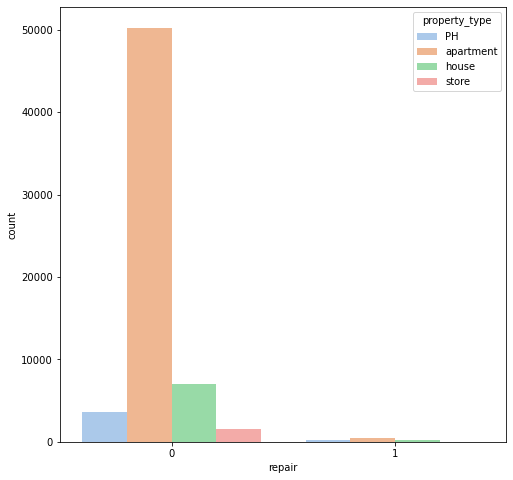

In [72]:
plt.subplots(figsize=(8,8))
sns.countplot(x='repair', hue='property_type', data=data, palette='pastel')

## [3.2 - Create 'pool' column](#seccion_pool)

In [73]:
data["pool"] = data["description"].str.contains(r'(?i)pileta|piscina|pisina|picina')

print(data[["description","pool"]])

                                              description   pool
0       2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...  False
2       2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...  False
4       DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...  False
5       Casa en el perímetro del barrio 338, ubicada e...  False
6       MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...  False
...                                                   ...    ...
121210  Dos viviendas en block en excelente ubicación ...  False
121214   ***VENTA CON RENTA***Local en EDIFICIO lomas ...  False
121215  TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...   True
121217  VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...  False
121218  2 Amb al contrafrente,  luminoso. El departame...  False

[63259 rows x 2 columns]


In [74]:
data_pool_column = data.apply(lambda x: 0 if x['pool'] == False else 1, axis=1)

data['pool'] = data_pool_column

data['pool'].value_counts()

0    49612
1    13647
Name: pool, dtype: int64

<AxesSubplot:xlabel='pool', ylabel='count'>

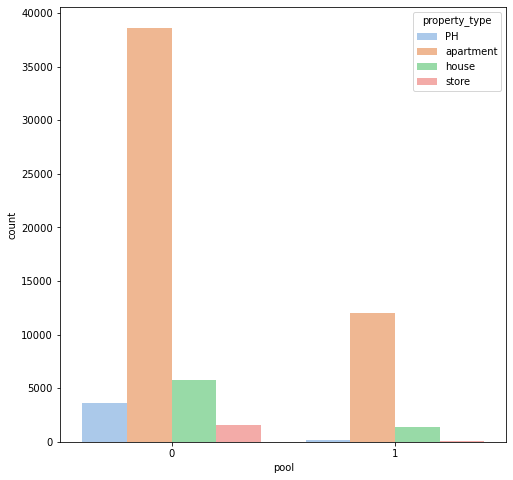

In [75]:
plt.subplots(figsize=(8,8))
sns.countplot(x='pool', hue='property_type', data=data, palette='pastel')

## [3.3 - Create 'amenities' column](#seccion_amenities)

In [76]:
data['amenities'] = data['description'].str.contains(r'(?i)amenities')

data[['description', 'amenities']]

,description,amenities
0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",False
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,False
4,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,False
5,"Casa en el perímetro del barrio 338, ubicada e...",False
6,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,False
...,...,...
121210,Dos viviendas en block en excelente ubicación ...,False
121214,***VENTA CON RENTA***Local en EDIFICIO lomas ...,False
121215,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,False
121217,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,True


In [77]:
data_amenities_column = data.apply(lambda x: 0 if x['amenities'] == False else 1, axis=1)

data['amenities'] = data_amenities_column

data['amenities'].value_counts()

0    55526
1     7733
Name: amenities, dtype: int64

<AxesSubplot:xlabel='amenities', ylabel='count'>

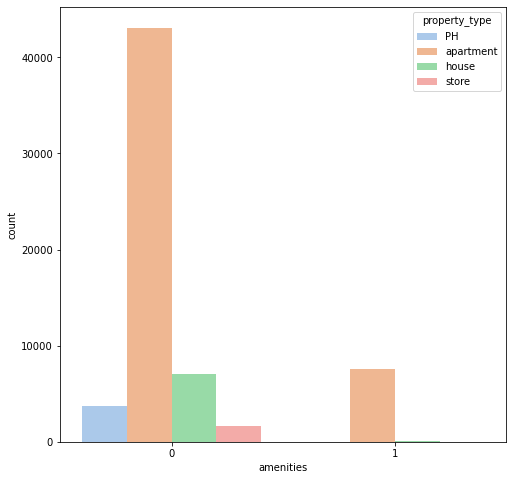

In [78]:
plt.subplots(figsize=(8,8))
sns.countplot(x='amenities', hue='property_type', data=data, palette='pastel')

## [3.4 - Create 'garage' column](#seccion_garage)

In [79]:
data['garage'] = data['description'].str.contains(r'(?i)garage|cochera|estacionamiento')

data_garage_column = data.apply(lambda x: 0 if x['garage'] == False else 1, axis=1)

data['garage'] = data_garage_column

data['garage'].value_counts()

0    36748
1    26511
Name: garage, dtype: int64

<AxesSubplot:xlabel='garage', ylabel='count'>

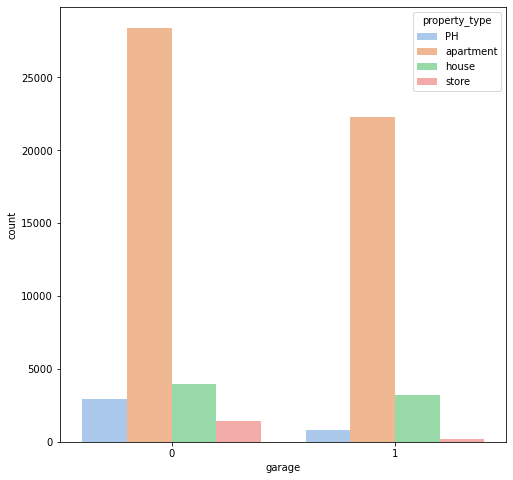

In [80]:
plt.subplots(figsize=(8,8))
sns.countplot(x='garage', hue='property_type', data=data, palette='pastel')

## [3.5 - Create 'financing' column](#seccion_financing)

In [81]:
data['financing'] = data['description'].str.contains(r'(?i)cuotas|financiacion|pozo|credito')

data_financing_column = data.apply(lambda x: 0 if x['financing'] == False else 1, axis=1)

data['financing'] = data_financing_column

data['financing'].value_counts()

0    50898
1    12361
Name: financing, dtype: int64

<AxesSubplot:xlabel='financing', ylabel='count'>

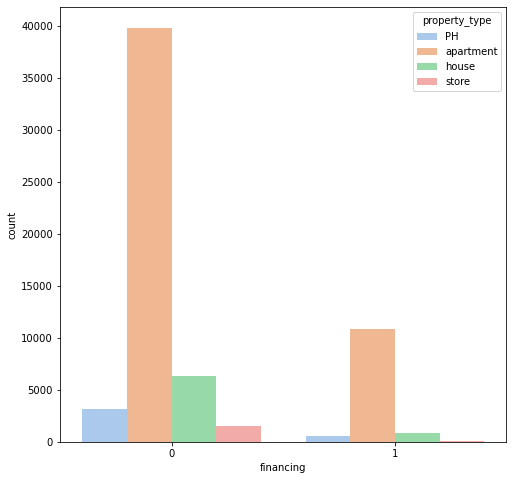

In [82]:
plt.subplots(figsize=(8,8))
sns.countplot(x='financing', hue='property_type', data=data, palette='pastel')

## [3.6 - Create 'rooms' column](#seccion_rooms)

In [83]:
# Number of rooms could be a number or a string, let's check on both. 

data['description'] = data['description'].astype(str)
data['title'] = data['title'].astype(str)

In [84]:
def search_pattern(pattern, column, new_column):
    
    regex_pattern = re.compile(pattern, re.IGNORECASE)
    match = data[column].apply(lambda x: x if x is np.NaN else regex_pattern.search(x).group("numero") if regex_pattern.search(x)!=None else np.NaN)
    data.insert(4, new_column, match)

In [85]:
# Doing some Regex! 

rooms_number = "(?P<numero>\d\d?) ?(ambientes|ambiente|amb)"
rooms_str = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(ambientes|ambiente|amb)"


search_pattern(rooms_number, "description", "room_number_description")
search_pattern(rooms_str, "description", "room_str_description")
search_pattern(rooms_number, "title", "room_number_title")
search_pattern(rooms_str, "title", "room_str_title")

In [86]:
data['room_str_description'] = data['room_str_description'].astype(str)
data['room_str_title'] = data['room_str_title'].astype(str)

In [87]:
# Replacing some strings for numbers

dictionary = {"mono":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}

data["room_str_description"].replace(dictionary, inplace=True ) 

data["room_str_title"].replace(dictionary, inplace=True)

In [88]:
mask_no_rooms = data['rooms'].isnull()
data.loc[mask_no_rooms,["room_number_description","room_str_description","room_number_title","room_str_title"]]

,room_number_description,room_str_description,room_number_title,room_str_title
0,2,nan,2,nan
2,2,nan,2,nan
4,NaN,nan,2,nan
5,NaN,nan,NaN,nan
6,NaN,nan,NaN,nan
...,...,...,...,...
121210,NaN,nan,NaN,nan
121214,NaN,nan,NaN,nan
121215,NaN,nan,3,nan
121217,NaN,1,NaN,nan


In [89]:
data["room_str_description"] = data["room_str_description"].str.lower()
data["room_str_title"] = data["room_str_title"].str.lower()

data["room_str_description"] = data["room_str_description"].replace(dictionary)
data["room_str_title"] = data["room_str_title"].replace(dictionary)

In [90]:
print('Room Number Description: ', data["room_number_description"].notnull().sum())
print('Room String Description: ', data["room_str_description"].notnull().sum())
print('Room Number Title: ', data["room_number_title"].notnull().sum())
print('Room String title: ', data["room_str_title"].notnull().sum())

Room Number Description:  27614
Room String Description:  57763
Room Number Title:  16550
Room String title:  61961


In [91]:
print('The amount of nulls in Rooms is:', data['rooms'].isnull().sum())

The amount of nulls in Rooms is: 34118


In [92]:
# Filling the null values in "rooms" with the data extracted from the description

data["rooms"].fillna(data["room_number_description"], axis=0, inplace=True)
data["rooms"].fillna(data["room_str_description"], axis=0,inplace=True)
data["rooms"].fillna(data["room_number_title"], axis=0,inplace=True)
data["rooms"].fillna(data["room_str_title"],axis=0, inplace=True)

In [93]:
print('The amount of nulls in Rooms, feter filling it is:', data['rooms'].isnull().sum())

The amount of nulls in Rooms, feter filling it is: 376


## [3.7 - Create 'bedrooms' column](#seccion_bedrooms)

In [94]:
bedroom_number = "(?P<numero>\d\d?) ?(dorm|cuarto)"
bedroom_str = "(?P<numero>mono|un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez) ?(dorm|cuarto)"

search_pattern(bedroom_number, "description", "bedroom_number")
search_pattern(bedroom_str, "description", "bedroom_str")

In [95]:
data.loc[mask_no_rooms,["bedroom_number","bedroom_str"]]

,bedroom_number,bedroom_str
0,NaN,NaN
2,NaN,NaN
4,1,NaN
5,NaN,dos
6,NaN,DOS
...,...,...
121210,2,NaN
121214,NaN,NaN
121215,2,NaN
121217,NaN,NaN


In [96]:
data["bedroom_str"] = data["bedroom_str"].str.lower()
dictionary_str = {"un":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9,"diez":10}
data["bedroom_str"] = data["bedroom_str"].replace(dictionary_str)

In [97]:
data.loc[mask_no_rooms,["rooms","bedroom_number","bedroom_str"]]

,rooms,bedroom_number,bedroom_str
0,2,NaN,NaN
2,2,NaN,NaN
4,nan,1,NaN
5,nan,NaN,2.0
6,nan,NaN,2.0
...,...,...,...
121210,nan,2,NaN
121214,nan,NaN,NaN
121215,nan,2,NaN
121217,nan,NaN,NaN


In [98]:
data['bedroom_number'].fillna(data['bedroom_str'], axis=0, inplace=True)

#### * Keep working on 'rooms' column

In [99]:
# Clean the column description

regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
pattern = re.compile(regex)
data["description_clean"] = data["description"].apply(lambda x: pattern.sub("", x))

In [100]:
# Let's look for some keywords for the column 'rooms'

data["kitchen_diningroom"] = data["description_clean"].str.contains(r'cocina comedor?') #cocina comedor
data["living_diningroom"] = data["description_clean"].str.contains(r'living comedor?') #living comedor
data["kitchen"] = data["description_clean"].str.contains(r'cocina?') #cocina unica
data["living"] = data["description_clean"].str.contains(r'living?') #living unico
data["diningroom"] = data["description_clean"].str.contains(r'comedor?') #comedor unico

In [101]:
# Creating dummy variables for the data that we found in 'description'

data["kitchen_diningroom"] =  data["kitchen_diningroom"].apply(lambda x: 0 if x == False else 1)
data["living_diningroom"] =  data["living_diningroom"].apply(lambda x: 0 if x == False else 1)
data["kitchen"] =  data["kitchen"].apply(lambda x: 0 if x == False else 1)
data["living"] =  data["living"].apply(lambda x: 0 if x == False else 1)
data["diningroom"] =  data["diningroom"].apply(lambda x: 0 if x == False else 1)

In [102]:
data.loc[mask_no_rooms,["kitchen_diningroom","living_diningroom", "kitchen", "living", "diningroom"]]

,kitchen_diningroom,living_diningroom,kitchen,living,diningroom
0,0,0,0,0,0
2,0,0,0,0,0
4,0,0,0,0,0
5,1,0,1,1,1
6,0,0,0,0,0
...,...,...,...,...,...
121210,0,1,1,1,1
121214,0,0,0,0,0
121215,0,0,0,0,1
121217,0,0,0,0,0


In [103]:
data["kitchen_diningroom"] = data["kitchen_diningroom"].astype(float)
data["living_diningroom"] = data["living_diningroom"].astype(float)
data["kitchen"] = data["kitchen"].astype(float)
data["living"] = data["living"].astype(float)
data["diningroom"] = data["diningroom"].astype(float)

In [104]:
# Let's sum the quantity of rooms and add it to 'room_sum' column

columns_list = ["kitchen_diningroom", "living_diningroom","kitchen", "living", "diningroom"]
columns_list
data["room_total"] = data[columns_list].sum(axis=1)
data.loc[mask_no_rooms,["rooms","kitchen_diningroom", "living_diningroom","kitchen", "living", "diningroom","room_total"]].sample(15)

,rooms,kitchen_diningroom,living_diningroom,kitchen,living,diningroom,room_total
73422,2,0.0,0.0,0.0,0.0,0.0,0.0
70012,nan,0.0,0.0,0.0,0.0,1.0,1.0
80674,1,0.0,0.0,1.0,0.0,0.0,1.0
58620,2,0.0,0.0,1.0,0.0,0.0,1.0
70692,nan,0.0,1.0,1.0,1.0,1.0,4.0
72065,nan,0.0,0.0,0.0,0.0,0.0,0.0
72147,4,0.0,0.0,0.0,0.0,0.0,0.0
87931,nan,0.0,1.0,1.0,1.0,1.0,4.0
72731,nan,0.0,0.0,0.0,0.0,0.0,0.0
105122,nan,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Logical conditions to complete the column 'rooms_total':
# For example: Add 1 room if the property hasn't a kitchen  

data["room_total"] = data.apply(lambda x: x.room_total + 1 if (x.bedroom_number != 0) and (x.kitchen_diningroom == 0) and (x.kitchen == 0) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.bedroom_number != 0) and (x.kitchen_diningroom == 1) and (x.kitchen == 1) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.bedroom_number == 0) and (x.living_diningroom == 1) and (x.living == 1) else x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.kitchen_diningroom == 1) and (x.diningroom == 1) else  x.room_total, axis=1)

data["room_total"] = data.apply(lambda x: x.room_total - 1 if (x.living_diningroom == 1) and (x.living == 1) else x.room_total, axis=1)

In [106]:
data["rooms_total"] = data["room_total"].replace(0, np.nan)
data.loc[mask_no_rooms,["rooms","room_number_description","kitchen_diningroom","living_diningroom","kitchen","living","diningroom","rooms_total"]].head(20)

,rooms,room_number_description,kitchen_diningroom,living_diningroom,kitchen,living,diningroom,rooms_total
0,2,2,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,0.0,0.0,0.0,0.0,0.0,1.0
4,nan,NaN,0.0,0.0,0.0,0.0,0.0,1.0
5,nan,NaN,1.0,0.0,1.0,1.0,1.0,2.0
6,nan,NaN,0.0,0.0,0.0,0.0,0.0,1.0
7,1,NaN,0.0,0.0,0.0,0.0,0.0,1.0
8,2,NaN,0.0,0.0,0.0,0.0,0.0,1.0
12,2,2,0.0,0.0,0.0,0.0,0.0,1.0
37,nan,NaN,0.0,0.0,0.0,0.0,1.0,2.0
39,nan,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
data["rooms"].fillna(data["rooms_total"], axis=0, inplace=True)

print(data["rooms"].isnull().sum())

0


In [108]:
data.drop(['operation','bedroom_str','bedroom_number', 'room_str_title', 'room_number_title', 'room_str_description', 'room_number_description', 'kitchen_diningroom', 'room_total', 'rooms_total'], axis=1, inplace = True)

In [109]:
# Droping nulls from 'rooms'

data = data.dropna(subset = ["rooms"])

In [110]:
data.isnull().sum()

property_type             0
price_aprox_usd        6371
rooms                     0
bedroom_number        39547
description               0
title                     0
state                     0
town                      0
extra_info                0
surface_covered_m2        0
surface_total_m2          0
price_usd_per_m2       6371
repair                    0
pool                      0
amenities                 0
garage                    0
financing                 0
description_clean         0
living_diningroom         0
kitchen                   0
living                    0
diningroom                0
dtype: int64

# [4 - Outliers](#section_outliers)

#### $\hspace{.5cm}$[4.1 - Analyze outliers 'price_usd_per_m2' column](#seccion_outliers)

#### $\hspace{.5cm}$[4.2 - Drop 'apartment' outliers](#seccion_apartment)

#### $\hspace{.5cm}$[4.3 - Drop 'PH' outliers](#seccion_ph)

#### $\hspace{.5cm}$[4.4 - Drop 'house' outliers](#seccion_house)

#### $\hspace{.5cm}$[4.5 - Drop 'store' outliers](#seccion_store)

## [4.1 - Analyze outliers from 'price_usd_per_m2' column](#seccion_outliers)

In [111]:
data['property_type'].value_counts()

apartment    50684
house         7210
PH            3742
store         1623
Name: property_type, dtype: int64

In [112]:
data.drop(data[data['price_usd_per_m2'] > 8000].index, axis=0, inplace=True)

<AxesSubplot:xlabel='property_type', ylabel='price_usd_per_m2'>

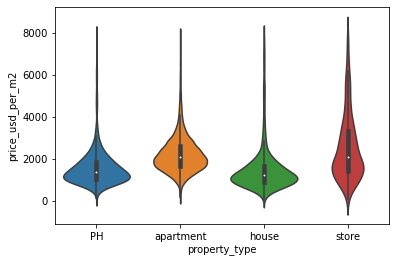

In [113]:
sns.violinplot(x='property_type', y='price_usd_per_m2', data=data)

## [4.2 - Drop outliers from 'apartment' property_type](#seccion_ap)

In [114]:
# Drop all values above 4500

price_apartment_m2_drop = (data['price_usd_per_m2'] > 4500) & (data['property_type'] == 'apartment')
data.drop(data.loc[price_apartment_m2_drop].index, axis = 0, inplace=True)

print(price_apartment_m2_drop.sum())

1025


## [4.3 - Drop outliers from 'PH' property_type](#seccion_ph)

In [115]:
price_PH_m2_drop = (data['price_usd_per_m2'] > 3000) & (data['property_type'] == 'PH')
data.drop(data.loc[price_PH_m2_drop].index, axis=0, inplace=True)

print(price_PH_m2_drop.sum())

171


## [4.4 - Drop outliers from 'house' property_type](#seccion_house)

In [116]:
price_house_m2_drop = (data['price_usd_per_m2'] > 2500) & (data['property_type'] == 'house')
data.drop(data.loc[price_house_m2_drop].index, axis=0, inplace=True)

print(price_house_m2_drop.sum())

536


## [4.5 - Drop outliers from 'store' property_type](#seccion_store)

In [117]:
price_store_m2_drop = (data['price_usd_per_m2'] > 6000) & (data['property_type'] == 'store')
data.drop(data.loc[price_store_m2_drop].index, axis=0, inplace=True)

print(price_store_m2_drop.sum())

55


<AxesSubplot:xlabel='property_type', ylabel='price_usd_per_m2'>

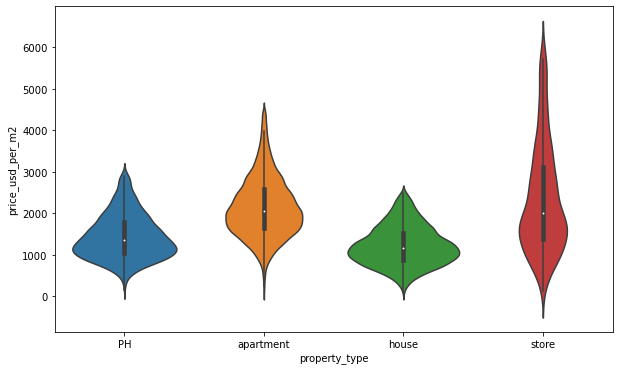

In [118]:
plt.subplots(figsize=(10,6))
sns.violinplot(x='property_type', y='price_usd_per_m2', data=data)

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Count'>

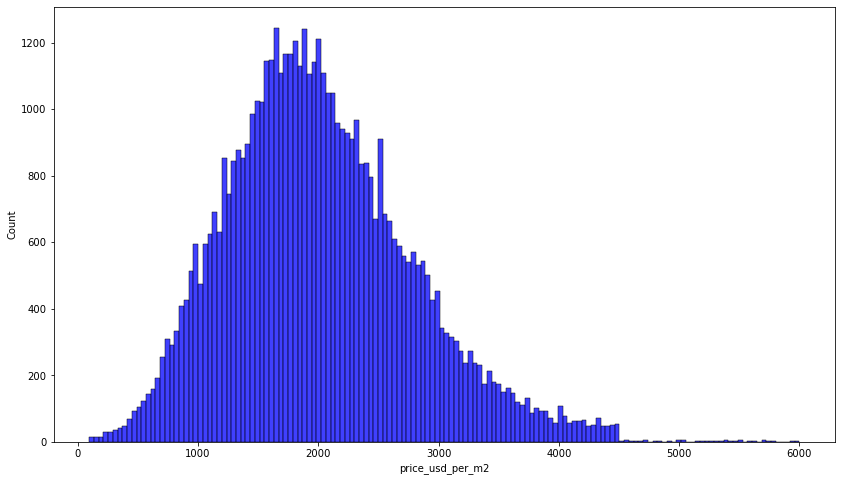

In [119]:
plt.subplots(figsize=(14,8))
sns.histplot(data['price_usd_per_m2'], color = "blue", bins = 150)

<AxesSubplot:xlabel='rooms', ylabel='count'>

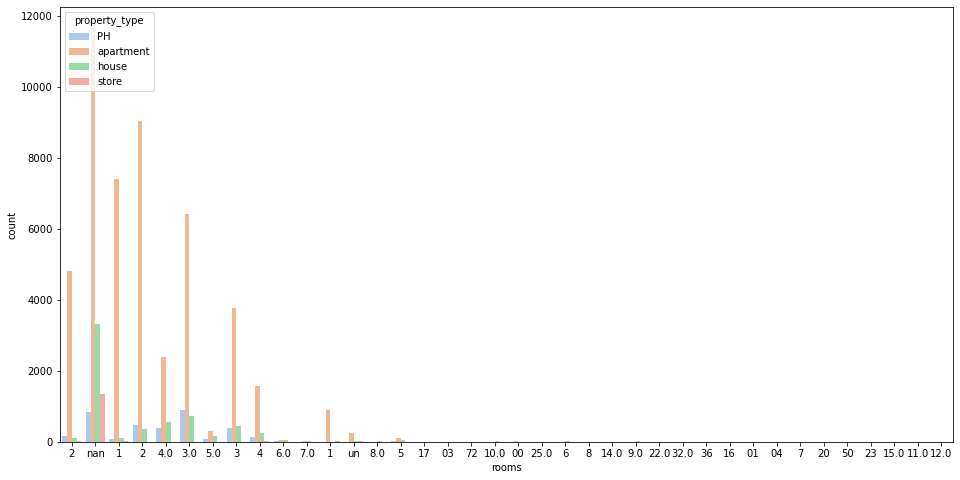

In [120]:
plt.subplots(figsize=(16,8))
sns.countplot(x='rooms', hue='property_type', data=data, palette='pastel')

# [5 - Data Final](#section_final)

#### This is the final dataset, with this dataset we're going to develop our ML Model! :)

In [122]:
data.head(3)

,property_type,price_aprox_usd,rooms,bedroom_number,description,title,state,town,extra_info,surface_covered_m2,...,repair,pool,amenities,garage,financing,description_clean,living_diningroom,kitchen,living,diningroom
0,PH,62000.0,2,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Capital Federal,Mataderos,,40.0,...,1,0,0,0,1,2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO ...,0.0,0.0,0.0,0.0
2,apartment,72000.0,2,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Capital Federal,Mataderos,,55.0,...,0,0,0,0,0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,0.0,0.0,0.0,0.0
4,apartment,64000.0,nan,1,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Buenos Aires Costa Atlántica,Mar del Plata,Centro|,35.0,...,0,0,0,0,0,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,0.0,0.0,0.0,0.0


In [123]:
data.shape

(59907, 22)